In [1]:
# project: p1
# submitter: walmousa
# partner: none
# hours: 6.5 

In [2]:
#import statements: 
import copy
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import subprocess
from subprocess import check_output
import numpy as np
import zipfile
from io import TextIOWrapper
import time

In [3]:
#Q1:
type(7/2)

float

In [4]:
#Q2: 
x = 4
maximum = 10
minimum = 5
error = (x<=minimum or x>=maximum) # True if x is outside the minimum-to-maximum range
error

True

In [5]:
#Q3: 
word = "KAFKAESQUE"
suffix_match = word[-5:].upper() =="ESQUE" # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [6]:
# add function

def add(x=1, y=1):
    return x+y

In [7]:
#Q4: 

add(3, 4)

7

In [8]:
#Q5:
add(9)

10

In [9]:
#Q6: 

x = 4
if x<0:
    status = "negative"
elif x>0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [10]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [11]:
def smart_count(some_list):
    total=0
    for x in some_list:
        if x>10:
            continue
        if x<0:
            break
        total+=x
    
    return total   

In [12]:
#Q7: 

smart_count(nums)

14

In [13]:
#Q8: 

smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [14]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1, "z": 3.14}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

In [15]:
#Q9: 

rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [16]:
#Q10:

rows[0][-1]["x"]

8

In [17]:
#Q11:

v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [18]:
#Q12: 
index_b=header.index("B")
total=0
for row in rows:
    total+=row[index_b]
total

10007

In [19]:
#Q13: 

rows.sort(key=lambda row: row[header.index("B")], reverse=True)
rows

[[3, 9999, {'x': 9, 'y': 2}],
 [1, 6, {'x': 8, 'y': 5}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [20]:
#Q14: 
import json

f = open("usd.json", encoding = "UTF-8")
data = json.load(f)
f.close()

print(type(data))
data["eur"]["rate"]*400

<class 'dict'>


371.910760725568

In [21]:

def divide(x, y):
    try:
        z = x/y
        return z
    except ZeroDivisionError:
        return float("nan")

In [22]:
#Q15: 

divide(3, 2)

1.5

In [23]:
#Q16: 

divide(-3, 0)

nan

In [24]:

os.listdir("home-computers")[0].split(".")[0]
directories= os.listdir("home-computers")

years_og={}
for file in directories:
    if file[0]== ".":
        continue
    years_og[int(file.split(".")[0][-4:])]= pd.read_csv(os.path.join("home-computers", file), skiprows=1).set_index("Geographic Area Name")

In [25]:
#Q17: 

keys = list(years_og.keys())

keys.sort()
years= {i: years_og[i] for i in keys}

list(years.keys())

[2013, 2014, 2015, 2016, 2017, 2018]

In [26]:
#Q18: 

years[2018].loc["Wisconsin"]["Estimate!!Total"]

2371960

In [27]:
#Q19: 
years[2018]["Estimate!!Total!!No Computer"].sum()

10285814

In [28]:
#Q20:

new_df= years[2018]["Margin of Error!!Total!!No Computer"]/years[2018]["Estimate!!Total!!No Computer"]
new_df.max()

0.12375641594322287

In [29]:
#Q21:

df_21 ={}

# for row in years[2018]:
states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]

for state in states:
    df_21[state]=years[2018].loc[state]["Estimate!!Total!!No Computer"]/years[2018].loc[state]["Estimate!!Total"] *100

df_21

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

Text(0.5, 0, 'Geographic Area Name')

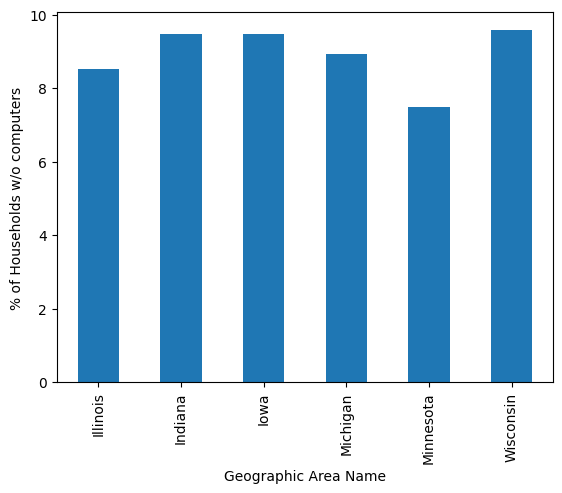

In [30]:
#Q22: 

ax=pd.Series(df_21).plot.bar()
ax.set_ylabel('% of Households w/o computers')
ax.set_xlabel('Geographic Area Name')

Text(0.5, 0, 'Year')

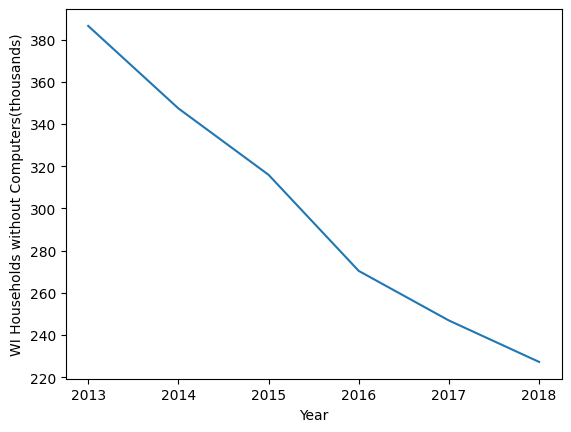

In [31]:
#Q23: 

df_23={}
for year in years:
    df_23[year]=years[year].loc["Wisconsin"]["Estimate!!Total!!No Computer"]/1000

ax=pd.Series(df_23).plot.line()
ax.set_ylabel('WI Households without Computers(thousands)')
ax.set_xlabel('Year')

Text(0.5, 0, 'Smartphones (millions)')

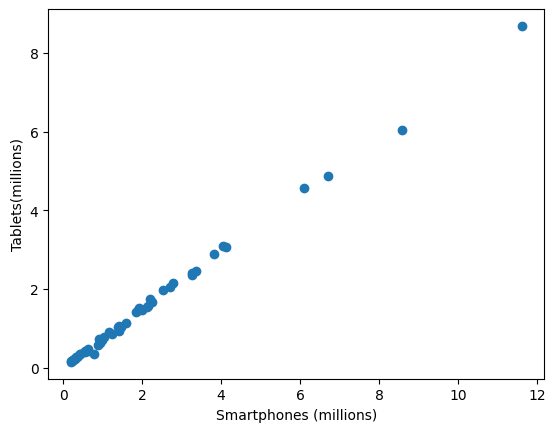

In [32]:
#Q24:
x= years[2018]["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"]/1e6
y=years[2018]["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]/1e6

plt.scatter(x, y)
plt.ylabel('Tablets(millions)')
plt.xlabel('Smartphones (millions)')

In [33]:
#Q25: 
check_output(["git", "checkout", "main"], cwd="flask")
git_log = check_output(["git", "log"], cwd="flask", encoding = "utf-8").split("\n")

git_log[0]

Already on 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [34]:
#Q26 
git_commits=[]
for line in git_log:
    if line[:6]=="commit":
        git_commits.append(line[7:])

git_commits[-30:]

['03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cda61f76c64b97ab9f730accc986a4b188',
 '03168a5d53457fdb8676a4ac9fca0f76a23c6852',
 '0b8e01b4450d0ba8cb65751d866568fddc155fa4',
 '6a3a046f55755f0691568431e68a8bfea8d89df0',
 'd78b04a3fca8d8887382606897d4a97e55062fda',
 '4671429a509094f36e2294055340197091d39979',
 '4e7aa9e7f7a86ee0ea4b6801694c13151518cb52',
 '85ca089dde8814c4a42ad4574cddce25d60e5e25',
 '8171da88a49eba769d313a51591ee8575be59762',
 'df929c6c77ea5490a969275e45075c29711a498c',
 '574e81f9c8bbdc41958e1e7a7613633b091101f8',
 '1fff3e598126a084348ec2c112fdd3bc6b9a1ee0',
 '05f36c7f7e2df36ee28f90d99632162579b1287c',
 '4e1b3e1134eb478563bc434d794085d0a412cb84',
 '8e9bd5f009bb8756a2a7d76a4b792323eeee49d6',
 '9dfab582d065521e9350327801ed2c5ced1c8fa1',
 '3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6',
 '7d6b8e9ab3e738d69e39ad53a7c0f6a552d5284a',
 'a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b

In [35]:
#Q27:

check_output(["git", "checkout", "main"], cwd="flask")

check_output(["git", "checkout", "b15ad394279fc3b7f998fa56857f334a7c0156f6"], cwd="flask")

f=open("flask/README", encoding="utf-8")
content=f.read()
f.close()

content

Already on 'main'
Note: switching to 'b15ad394279fc3b7f998fa56857f334a7c0156f6'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at b15ad394 Added setup.py and README


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [36]:
#Q28:

check_output(["git", "checkout", "main"], cwd="flask")
commit_dict={}
author_names=[]
for line in git_log:
    if line[:14]=="    Merge pull":
        email=line.split(" ")[-1]
        name=email.split("/")[0]
        if name not in author_names:
            author_names.append(name)
            commit_dict[name]=1
        else:
            commit_dict[name]+=1

final_dict={}

for name in commit_dict:
    if commit_dict[name]>=5:
        final_dict[name]=commit_dict[name]
final_dict

Previous HEAD position was b15ad394 Added setup.py and README
Switched to branch 'main'


{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'jeffwidman': 8,
 'garenchan': 8,
 'davidism': 45,
 'dawran6': 7,
 'untitaker': 20,
 'lord63-forks': 5,
 'methane': 5,
 'Winnetou': 6,
 'defuz': 6,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [37]:
#Q29:

check_output(["git", "checkout", "main"], cwd="flask")

try:
    msg = check_output(["pip3", "instal"], stderr=subprocess.STDOUT, encoding="utf-8")
except subprocess.CalledProcessError as e:
    msg = e.output

msg

Already on 'main'


'ERROR: unknown command "instal" - maybe you meant "install"\n'

Text(0.5, 0, 'Rows')

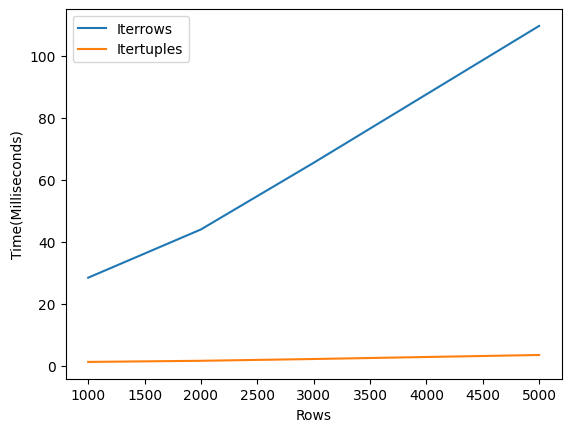

In [38]:
#Q30:
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])

def comp_time(df):
    t0=time.time()
    for row in df.iterrows():
        pass
    t1=time.time()
    return (t1-t0)*1e3

def comp_time_tuple(df):
    t0=time.time()
    for row in df.itertuples():
        pass
    t1=time.time()
    return (t1-t0)*1e3

times_df = pd.DataFrame(dtype=float)
times_df.at[1000, "Iterrows"] = comp_time(rand_df(1000))
times_df.at[2000, "Iterrows"] = comp_time(rand_df(2000))
times_df.at[3000, "Iterrows"] = comp_time(rand_df(3000))
times_df.at[5000, "Iterrows"] = comp_time(rand_df(5000))
times_df.at[1000, "Itertuples"] = comp_time_tuple(rand_df(1000))
times_df.at[2000, "Itertuples"] = comp_time_tuple(rand_df(2000))
times_df.at[3000, "Itertuples"] = comp_time_tuple(rand_df(3000))
times_df.at[5000, "Itertuples"] = comp_time_tuple(rand_df(5000))


ax=times_df.plot.line()
ax.set_ylabel('Time(Milliseconds)')
ax.set_xlabel('Rows')


Text(0.5, 0, 'Rows')

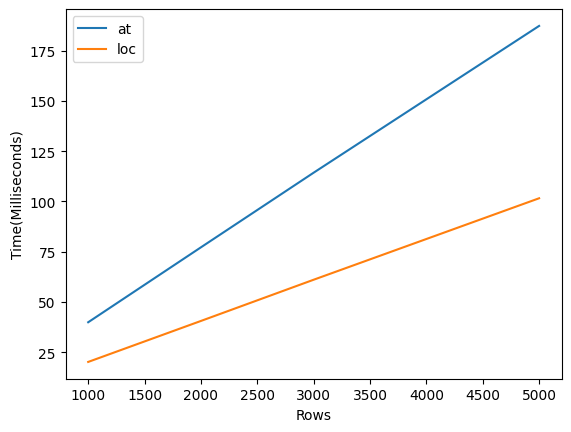

In [39]:
#Q31: 
def time_loc(df):
    total = 0
    t0=time.time()
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1=time.time()
    return (t1-t0)*1e3

def time_at(df):
    total = 0
    t0=time.time()
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t1=time.time()
    return (t1-t0)*1e3

times_df = pd.DataFrame(dtype=float)
times_df.at[1000, "at"] = time_loc(rand_df(1000))
times_df.at[2000, "at"] = time_loc(rand_df(2000))
times_df.at[3000, "at"] = time_loc(rand_df(3000))
times_df.at[5000, "at"] = time_loc(rand_df(5000))
times_df.at[1000, "loc"] = time_at(rand_df(1000))
times_df.at[2000, "loc"] = time_at(rand_df(2000))
times_df.at[3000, "loc"] = time_at(rand_df(3000))
times_df.at[5000, "loc"] = time_at(rand_df(5000))
ax=times_df.plot.line()

ax.set_ylabel('Time(Milliseconds)')
ax.set_xlabel('Rows')


Text(0.5, 0, 'Rows')

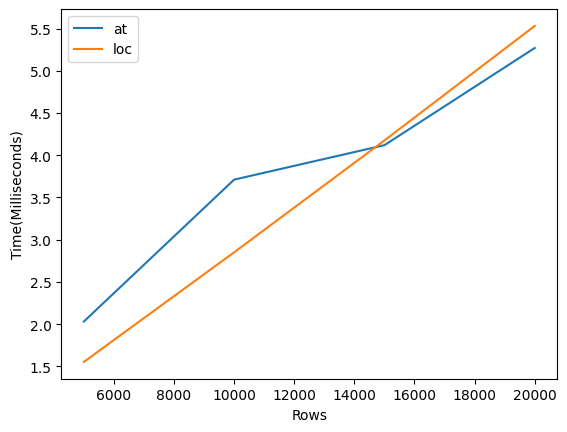

In [40]:
#Q32:

def laugh(x):
    return "ha" * x

def apply_time(df):
    t0=time.time()
    result = df["A"].apply(laugh).tolist()
    t1=time.time()
    return (t1-t0)*1e3

def loop_time(df):
    result = []
    t0=time.time()
    for val in df["A"]:
        result.append(laugh(val))
    t1=time.time()
    return (t1-t0)*1e3


times_df = pd.DataFrame(dtype=float)
times_df.at[5000, "at"] = apply_time(rand_df(5000))
times_df.at[10000, "at"] = apply_time(rand_df(10000))
times_df.at[15000, "at"] = apply_time(rand_df(15000))
times_df.at[20000, "at"] = apply_time(rand_df(20000))
times_df.at[5000, "loc"] = loop_time(rand_df(5000))
times_df.at[10000, "loc"] = loop_time(rand_df(10000))
times_df.at[15000, "loc"] = loop_time(rand_df(15000))
times_df.at[20000, "loc"] = loop_time(rand_df(20000))
ax=times_df.plot.line()

ax.set_ylabel('Time(Milliseconds)')
ax.set_xlabel('Rows')
